In [1]:
import pandas as pd
import movingpandas as mpd
from datetime import datetime, timedelta

from model import ShipModel

MAX_STEPS = 500

ports = [(11,10), (30,30),(70,50),(10,70),(70,20), (90,89)]
obstacles = [(99,99),(10,0),(6,60),(45,24),(20,18),(60,85),(40,15),(60,40),(69,30)]
model = ShipModel(population=5, vision=20, avoidance=1.1, ports=ports, obstacles=obstacles)
for type, agents in model.agents_by_type.items():
    print(f'{type}: {len(agents)}')


Could not import SolaraViz. If you need it, install with 'pip install --pre mesa[viz]'
Setting starting port to [30 30] ...
Setting destination port to (11, 10) ...
Setting max speed to 1.3505911733998817 ...
Setting starting port to [70 20] ...
Setting destination port to (90, 89) ...
Setting max speed to 1.1173129441775234 ...
Setting starting port to [90 89] ...
Setting destination port to (30, 30) ...
Setting max speed to 1.3554597809376547 ...
Setting starting port to [70 20] ...
Setting destination port to (10, 70) ...
Setting max speed to 1.245841380958599 ...
Setting starting port to [70 20] ...
Setting destination port to (30, 30) ...
Setting max speed to 1.319949163134961 ...
<class 'ship.Ship'>: 5
<class 'obstacle.Obstacle'>: 9


In [2]:
print(f"{datetime.now()} Starting ...")
for t in range(MAX_STEPS):
    model.step()
print(f"{datetime.now()} Finished.")

2025-02-13 12:37:41.329796 Starting ...
Step ...
Step ...
Step ...
Step ...
Step ...
Step ...
Step ...
Step ...
Step ...
Step ...
Step ...
Step ...
Step ...
Step ...
Step ...
Step ...
Step ...
Step ...
Step ...
Step ...
Step ...
Step ...
Step ...
Step ...
Step ...
Step ...
Step ...
Step ...
Step ...
Step ...
Step ...
Step ...
Step ...
Step ...
Step ...
Step ...
Step ...
Step ...
Step ...
Step ...
Step ...
Step ...
Step ...
Step ...
Step ...
Step ...
Step ...
Step ...
Step ...
Step ...
Step ...
Step ...
Step ...
Step ...
Step ...
Step ...
Step ...
Step ...
Step ...
Step ...
Step ...
Step ...
Step ...
Step ...
Step ...
Step ...
Step ...
Step ...
Step ...
Step ...
Step ...
Step ...
Step ...
Step ...
Step ...
Step ...
Step ...
Step ...
Step ...
Step ...
Step ...
Step ...
Step ...
Step ...
Step ...
Step ...
Step ...
Step ...
Step ...
Step ...
Step ...
Step ...
Step ...
Step ...
Step ...
Step ...
Step ...
Step ...
Step ...
Step ...
Step ...
Step ...
Step ...
Step ...
Step ...
Step ...
Step .

In [3]:
agent_df = model.datacollector.get_agent_vars_dataframe()

In [4]:
df = agent_df.reset_index()
df[['x', 'y']] = pd.DataFrame(df['pos'].tolist(), index=df.index)
df = df.drop(columns=['pos'])
df[df.AgentID==1]

,Step,AgentID,x,y
0,0,1,30.000000,30.000000
14,1,1,30.017604,30.007148
28,2,1,30.044623,30.017683
42,3,1,30.080309,30.030742
56,4,1,30.124880,30.045655
...,...,...,...,...
6944,496,1,11.036040,10.008621
6958,497,1,11.035042,10.008560
6972,498,1,11.034044,10.008489
6986,499,1,11.033048,10.008408


In [5]:
start_datetime = datetime.now()
df["t"] = df["Step"].apply(lambda step: start_datetime + timedelta(seconds=step))

In [6]:
tc = mpd.TrajectoryCollection(df, traj_id_col='AgentID', t='t', x='x', y='y', crs=31287)

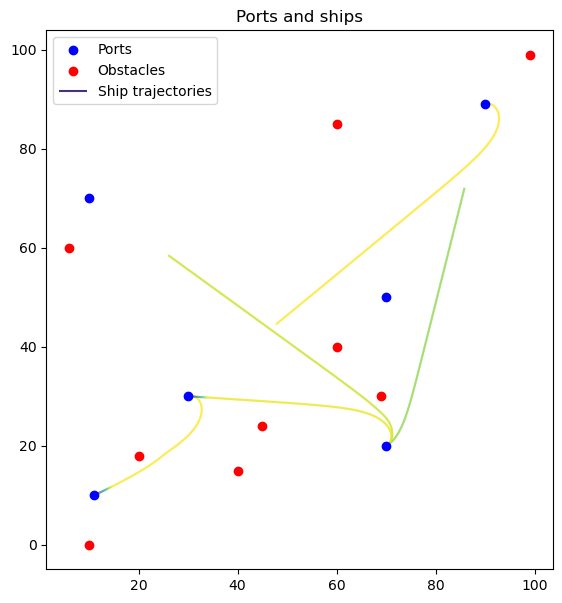

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(7,7))

x_coords, y_coords = zip(*ports)
ax.scatter(x_coords, y_coords, color='blue', label='Ports', zorder=5)
x_coords, y_coords = zip(*obstacles)
ax.scatter(x_coords, y_coords, color='red', label='Obstacles', zorder=5)
tc.plot(ax=ax, label='Ship trajectories', column='speed')

# Labels and legend
ax.legend()
ax.set_title("Ports and ships")

plt.show()

## TODOs

- Get start orientation of vessels from port?
- Get speed based on route? 
- Add speed anomalies
- Add location anomalies (i.e. vessels ignore obstacles)
- Add direction anomalies? 
- Create export for M³ training, incl. MMSI, T, LAT, LON, SOG, COG, vessel type? 

In [8]:
tc.trajectories[3].hvplot(c='speed')

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Path.I   :Path   [Longitude,Latitude]   (speed)
   .Points.I :Points   [Longitude,Latitude]   (speed,triangle_angle)